In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## Load Partial Model

In [6]:
from prophet.serialize import model_to_json, model_from_json

with open('2021_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

## Load processed Future Data

In [7]:
future_df = pd.read_csv('processed_future_data.csv')

In [8]:
future_df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
future_df

,Date,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [10]:
future_df.rename(columns={'Date':'ds'}, inplace=True)

In [11]:
future_df

,ds,temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2022-06-13 00:00:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
1,2022-06-13 00:15:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
2,2022-06-13 00:30:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
3,2022-06-13 00:45:00,36.0,14.0,26.86,9.4,230.0,50.0,3.0
4,2022-06-13 01:00:00,35.0,15.0,30.28,9.4,230.0,50.0,3.0
...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1341,2022-06-26 23:15:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1342,2022-06-26 23:30:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1
1343,2022-06-26 23:45:00,35.9,21.5,43.51,23.8,121.9,55.2,24.1


In [25]:
future_df['cap'] = 7000

## Make predictions on Future Data

In [26]:
predictions = saved_mv_model.predict(future_df)

In [27]:
predictions

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,winddir,winddir_lower,winddir_upper,windspeed,windspeed_lower,windspeed_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-13 00:00:00,6996.763686,7000,5529.140743,8792.055468,6996.763340,6996.763993,181.736814,181.736814,181.736814,...,84.903305,84.903305,84.903305,-1.072070,-1.072070,-1.072070,0.0,0.0,0.0,7178.500500
1,2022-06-13 00:15:00,6996.763496,7000,5407.030571,8749.225103,6996.763151,6996.763804,165.450968,165.450968,165.450968,...,84.903305,84.903305,84.903305,-1.072070,-1.072070,-1.072070,0.0,0.0,0.0,7162.214464
2,2022-06-13 00:30:00,6996.763307,7000,5425.440291,8758.231472,6996.762962,6996.763615,147.504793,147.504793,147.504793,...,84.903305,84.903305,84.903305,-1.072070,-1.072070,-1.072070,0.0,0.0,0.0,7144.268100
3,2022-06-13 00:45:00,6996.763118,7000,5327.880204,8839.384435,6996.762772,6996.763426,128.060369,128.060369,128.060369,...,84.903305,84.903305,84.903305,-1.072070,-1.072070,-1.072070,0.0,0.0,0.0,7124.823487
4,2022-06-13 01:00:00,6996.762929,7000,5641.335845,8858.790253,6996.762583,6996.763237,204.379016,204.379016,204.379016,...,84.903305,84.903305,84.903305,-1.072070,-1.072070,-1.072070,0.0,0.0,0.0,7201.141945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,2022-06-26 23:00:00,6996.499956,7000,6723.347224,10000.251312,6996.499536,6996.500329,1391.599103,1391.599103,1391.599103,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,8388.099059
1341,2022-06-26 23:15:00,6996.499751,7000,6696.931754,10108.613650,6996.499331,6996.500124,1381.558757,1381.558757,1381.558757,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,8378.058509
1342,2022-06-26 23:30:00,6996.499547,7000,6619.697480,10010.765442,6996.499126,6996.499920,1370.128324,1370.128324,1370.128324,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,8366.627871
1343,2022-06-26 23:45:00,6996.499342,7000,6765.944598,10093.797479,6996.498922,6996.499715,1357.176201,1357.176201,1357.176201,...,-38.160528,-38.160528,-38.160528,-8.720557,-8.720557,-8.720557,0.0,0.0,0.0,8353.675543


In [28]:
future_predictions = predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [29]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,7178.500500,5529.140743,8792.055468
1,2022-06-13 00:15:00,7162.214464,5407.030571,8749.225103
2,2022-06-13 00:30:00,7144.268100,5425.440291,8758.231472
3,2022-06-13 00:45:00,7124.823487,5327.880204,8839.384435
4,2022-06-13 01:00:00,7201.141945,5641.335845,8858.790253
...,...,...,...,...
1340,2022-06-26 23:00:00,8388.099059,6723.347224,10000.251312
1341,2022-06-26 23:15:00,8378.058509,6696.931754,10108.613650
1342,2022-06-26 23:30:00,8366.627871,6619.697480,10010.765442
1343,2022-06-26 23:45:00,8353.675543,6765.944598,10093.797479


## Plot Predictions

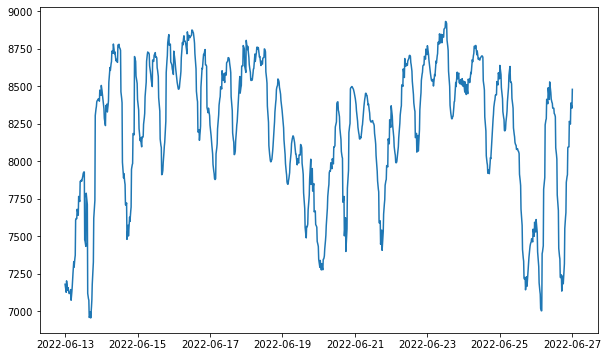

In [30]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])

In [31]:
factual = pd.read_csv('future_actual_load.csv')

In [32]:
factual

,Unnamed: 0,Date,Haryana Load (MW)
0,0,2022-06-14 00:15:00,9000.18
1,1,2022-06-14 00:30:00,8768.38
2,2,2022-06-14 00:45:00,8777.00
3,3,2022-06-14 01:00:00,9093.66
4,4,2022-06-14 01:15:00,9082.27
...,...,...,...
564,564,2022-06-19 22:45:00,7538.72
565,565,2022-06-19 23:00:00,7307.08
566,566,2022-06-19 23:15:00,7204.57
567,567,2022-06-19 23:30:00,7194.45


In [33]:
future_predictions

,ds,yhat,yhat_lower,yhat_upper
0,2022-06-13 00:00:00,7178.500500,5529.140743,8792.055468
1,2022-06-13 00:15:00,7162.214464,5407.030571,8749.225103
2,2022-06-13 00:30:00,7144.268100,5425.440291,8758.231472
3,2022-06-13 00:45:00,7124.823487,5327.880204,8839.384435
4,2022-06-13 01:00:00,7201.141945,5641.335845,8858.790253
...,...,...,...,...
1340,2022-06-26 23:00:00,8388.099059,6723.347224,10000.251312
1341,2022-06-26 23:15:00,8378.058509,6696.931754,10108.613650
1342,2022-06-26 23:30:00,8366.627871,6619.697480,10010.765442
1343,2022-06-26 23:45:00,8353.675543,6765.944598,10093.797479


In [34]:
future_predictions.index[future_predictions['ds'] == '2022-06-14 00:15:00']

Int64Index([97], dtype='int64')

In [35]:
future_predictions.index[future_predictions['ds'] == '2022-06-19 23:45:00']

Int64Index([671], dtype='int64')

In [36]:
future_predictions = future_predictions[97:672]

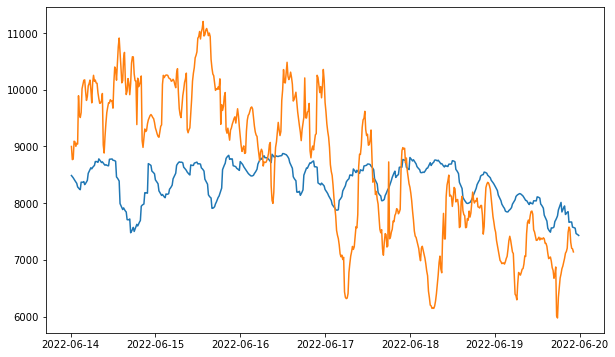

In [37]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(future_predictions['ds'], future_predictions['yhat'])
plt.plot(future_predictions['ds'][:569], factual['Haryana Load (MW)'])